# MRI Programming Task Sheet #3

## Importing Libraries

In [19]:
%matplotlib inline
%matplotlib notebook
import scipy.constants as c
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import style
from PIL import Image
from sympy import *
from qutip import *
from pylab import *

## Number1
    Create a function that would draw the trajectory at any point in the spacer.
    
> <span style = "color: black;"> ***First Section*** </span>
- ***First 2 functions Below,*** we initiate a function that get us the <span style = "color: red;"> **magnetic moment of particle** </span> then use it to get our <span style = "color: red;"> **bulk vector** </span>
- ***Last function,*** we simulate <span style = "coloe: red;"> **bloch equation** </span> the recovery and decay exponential in both <span style = "color: blue;"> *z-plane* </span> and <span style = "color: blue;"> *x-y plane* </span>

> <span style = "color: black;"> ***Second Section*** </span>
- ***Trajectory in 3-D plane***

Enter x coordinate : 2
Enter y coordinate : 3


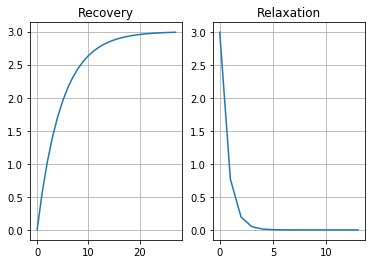

In [20]:
# Get the value of magnetic moment vector
def Get_Mag(Geo, Spin_QNum):
    Angr_Momentum = c.hbar * mt.sqrt(Spin_QNum * (Spin_QNum + 1))
    MgMoment = Geo * Angr_Momentum
    return MgMoment

# Return the value of bulk magnetization vector
def Bulk(Spin_Num):
    bulk_vec = 0
    i = 1
    while i <= Spin_Num:
        bulk_vec = i * Get_Mag(42.0, 0.5)
        i += 1
    return bulk_vec * mt.exp(71)

Mxy, Mz, t1, t2 = [ ], [ ], [ ], [ ]
TR, TE, T1w, T1o, T2w, T2o = 2.8, 1.4, 10.45, 0.475, 1.055, 0.0735
M0 = 3 # 1.5

# Get the bloch equation
def Get_Bloch(Magnetic_Field, RecTime, DecTime, x, y, step):
    for j in np.arange(0, x, step):
        t1.append(j)
    for k in np.arange(0, y, step):
        t2.append(k)        
    i = 0
    while i <= len(t1) - 1:
        Longatudinal_Plane = Magnetic_Field * (1 - mt.exp((t1[i] * -1) / RecTime))
        Mz.append(Longatudinal_Plane)
        i += 1
    l = 0
    while l <= len(t2) - 1:
        Transverse_Plane = Magnetic_Field * mt.exp((t2[l] * -1) / DecTime)
        Mxy.append(Transverse_Plane)
        l += 1
    return Mz, Mxy

Get_Mag(42.6, 0.5);
Bulk(50);

coordx = input ("Enter x coordinate : ")
coordy = input ("Enter y coordinate : ")
if (int(coordx) <= 16):
    Get_Bloch(M0, T1o, T2o, 2.8, 1.4, 0.1);
else :
    Get_Bloch(M0, T1w, T2w, 28, 14, 1);
%matplotlib notebook
%matplotlib inline
f = plt.figure()
f.add_subplot(1, 2, 1)
plt.title('Recovery')
plt.plot(Mz)
plt.grid()
f.add_subplot(1, 2, 2)
plt.title('Relaxation')
plt.plot(Mxy)
plt.grid()
plt.show()

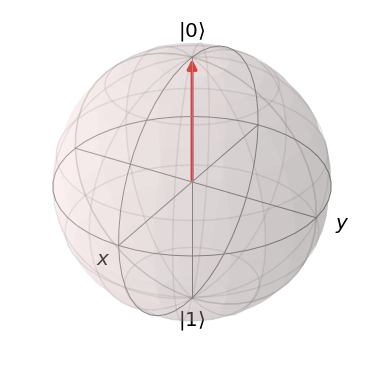

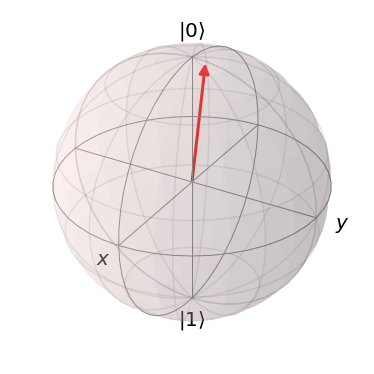

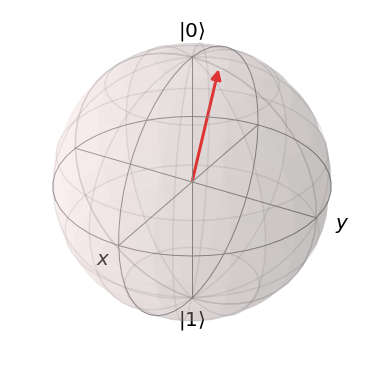

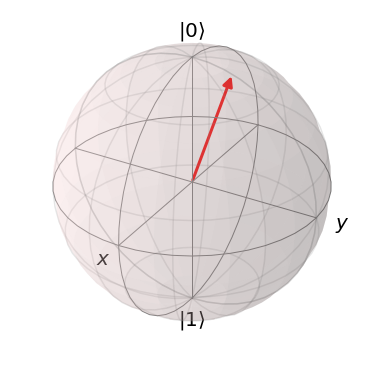

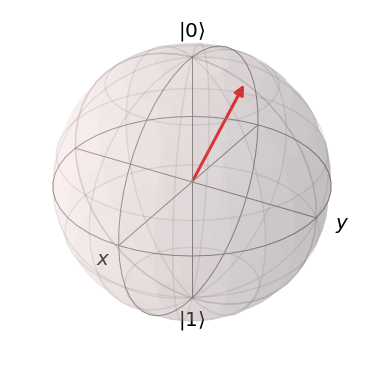

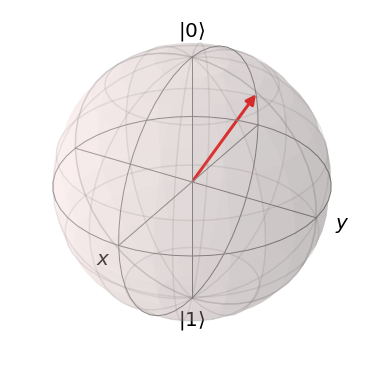

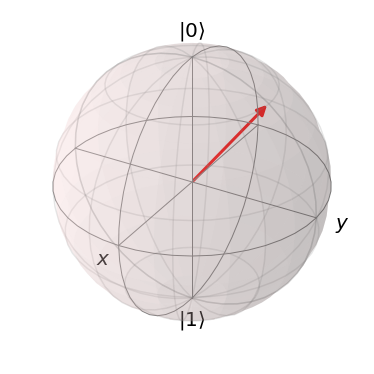

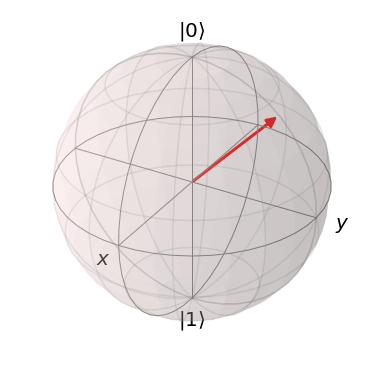

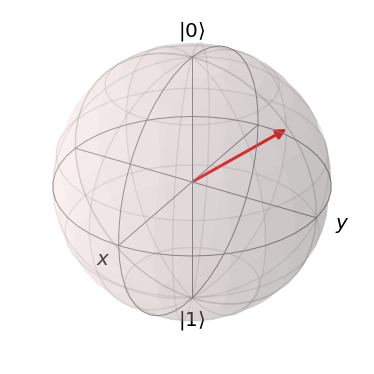

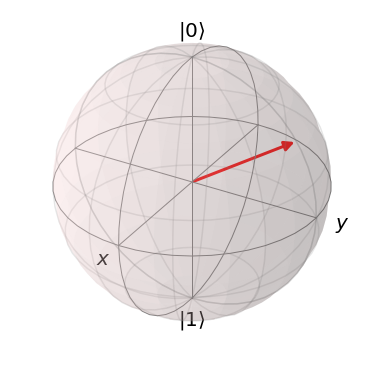

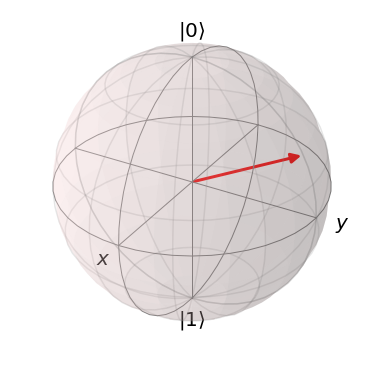

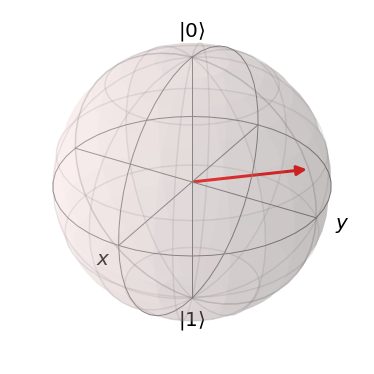

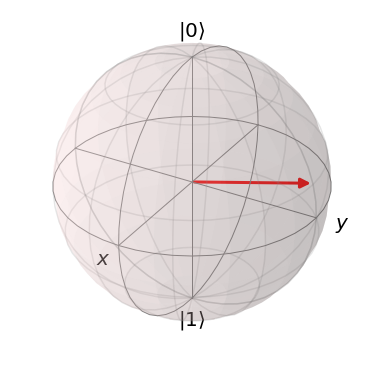

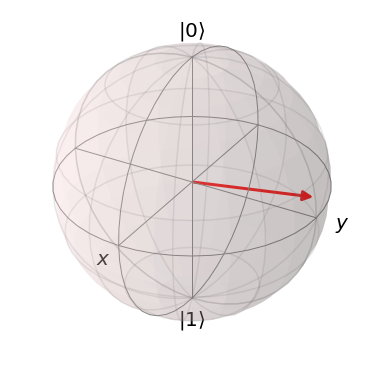

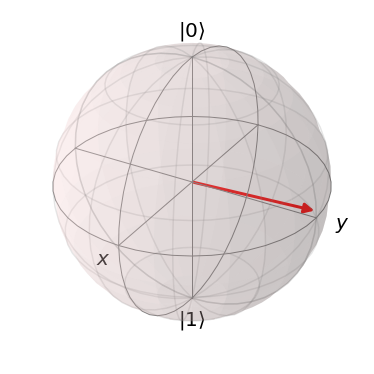

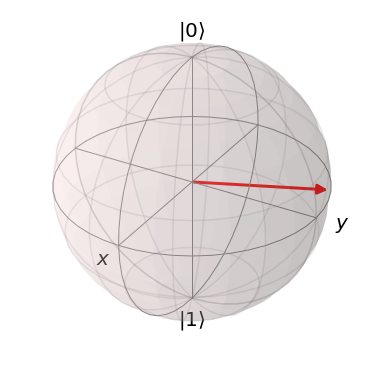

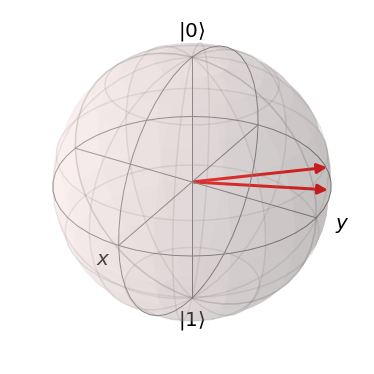

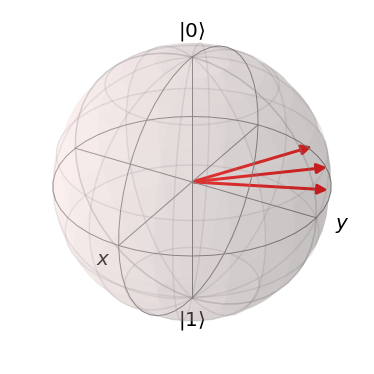

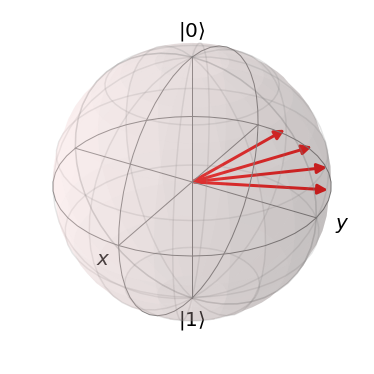

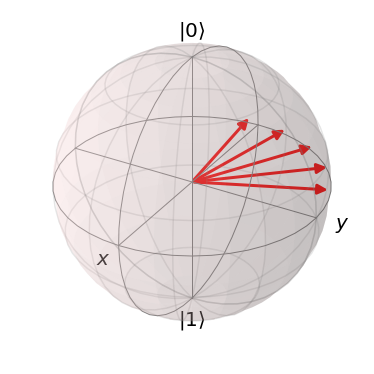

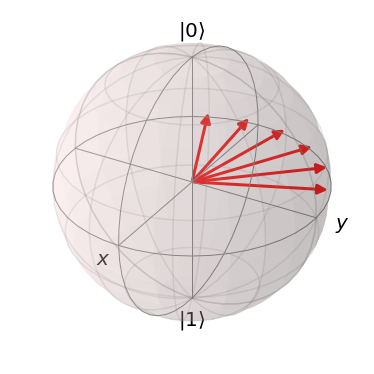

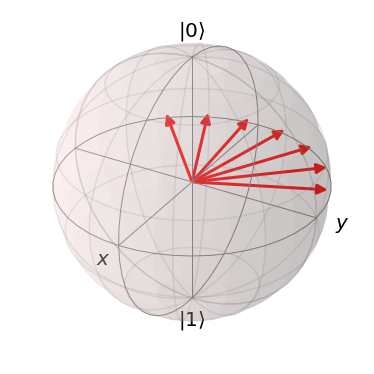

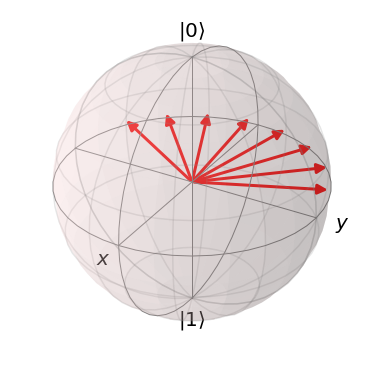

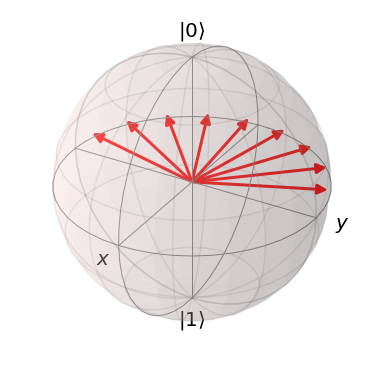

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f9fe0888dd0>
Traceback (most recent call last):
  File "/home/marwa/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py", line 178, in <lambda>
    ref = weakref.ref(self, lambda ref, sid=id(self),
KeyboardInterrupt


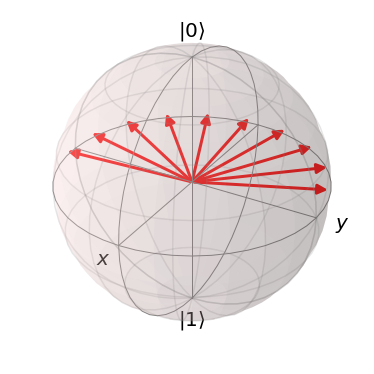

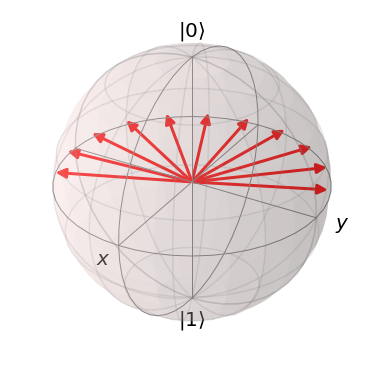

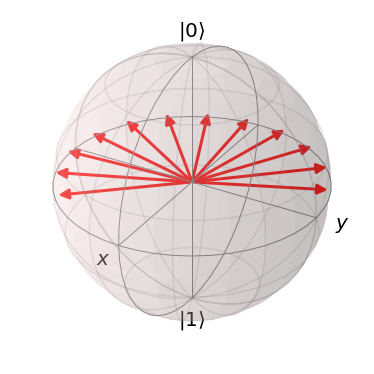

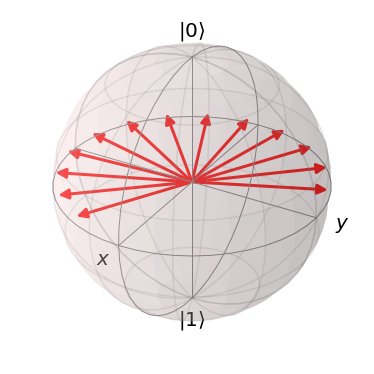

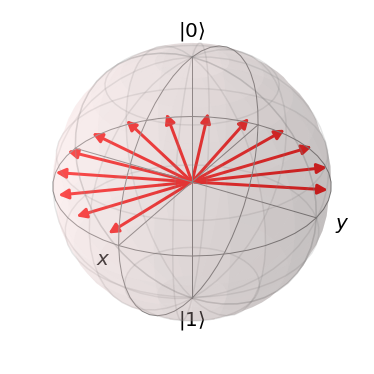

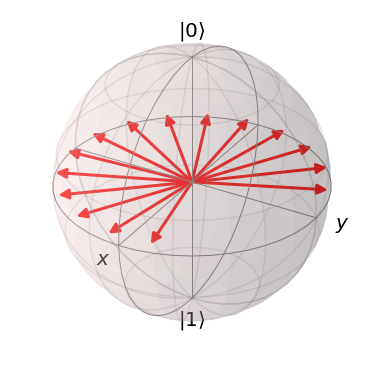

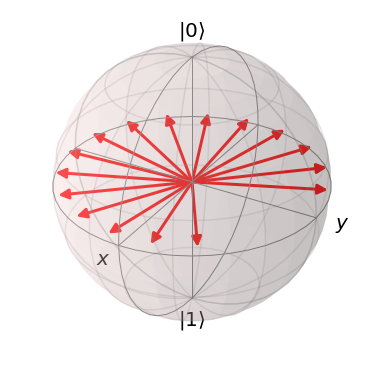

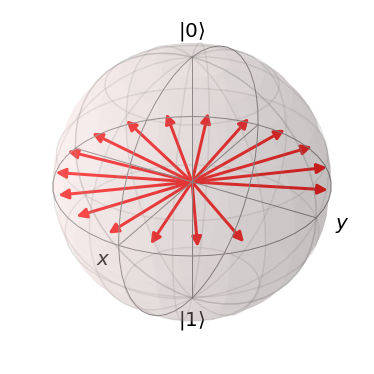

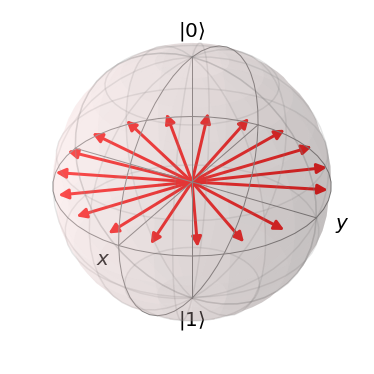

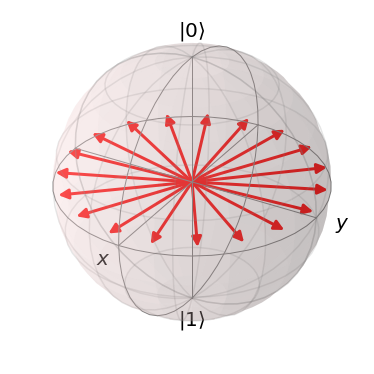

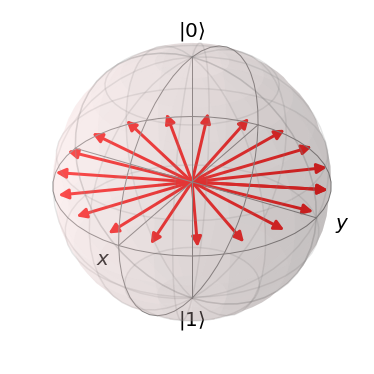

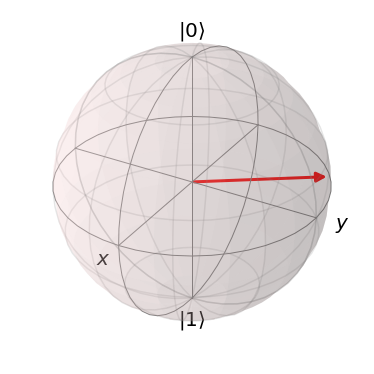

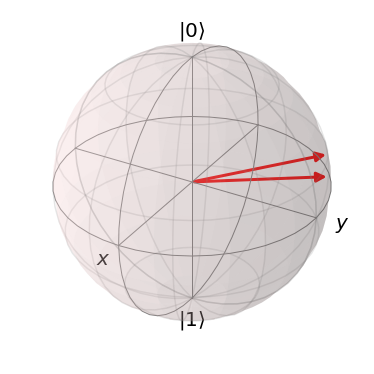

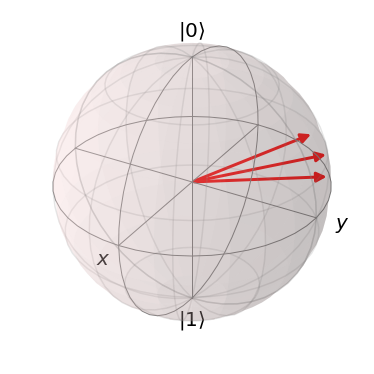

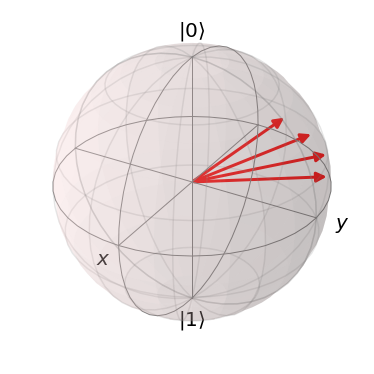

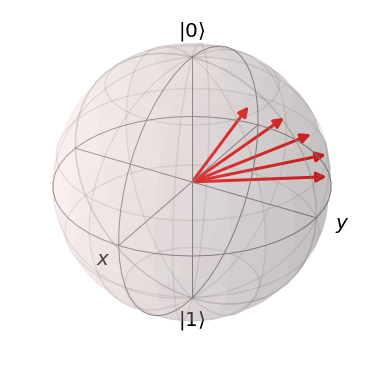

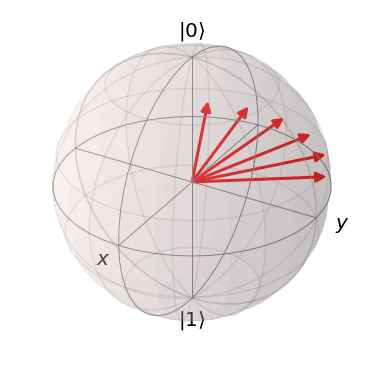

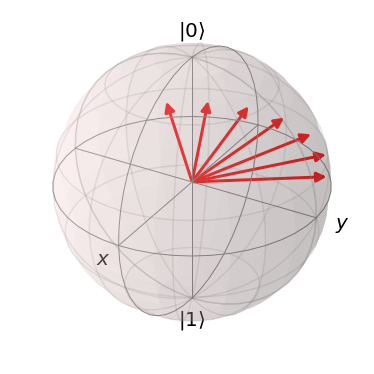

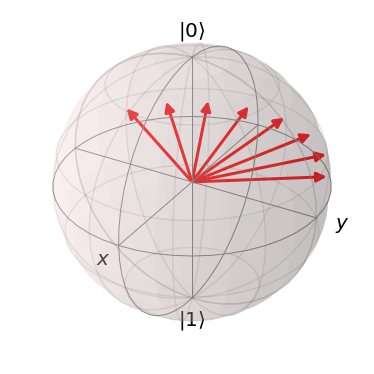

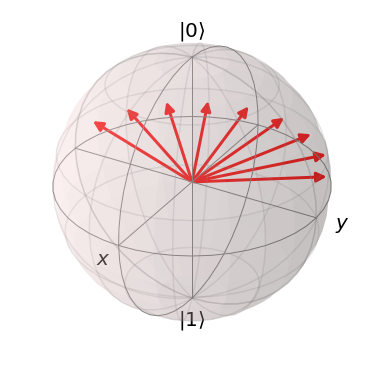

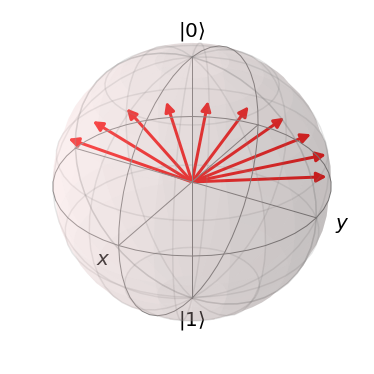

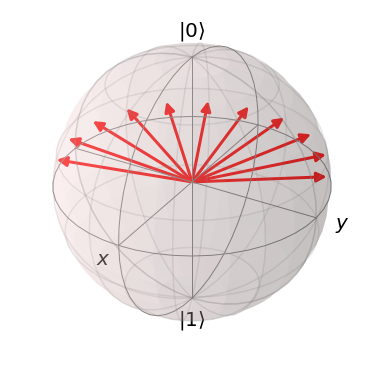

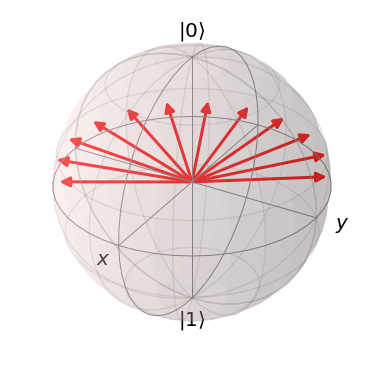

KeyboardInterrupt: 

In [21]:
B= 3 # 3T

b = Bloch()
b.show()
zz=[]
g=42
wo=g*B

%matplotlib notebook
for th in np.linspace(0, pi , 30):
    b.clear()
    %matplotlib notebook
    b.vector_color = ['r']
 # RF pulse = 90 degree

    if th <= pi/2 :
        x=1
        y=np.sin(th)
        z=np.cos(th)
        r    =  1
        b.clear()
        zz = [0 ,sin( th ),cos( th )]
        b.add_vectors(zz)
        %matplotlib notebook
        b.show()
        b.save(dirc='temp')
# Recovery 
    if th > pi/2 :  
        for Gy in np.linspace(-pi , pi, 20):      

            z0 = [r * sin((th-pi)) * cos( Gy + (2*pi*wo*0.05)) ,r * sin( (th-pi) ) * sin(Gy +(2*pi*wo*0.05)),r * cos( (th-pi) )]   
            b.add_vectors(z0)
            %matplotlib notebook
        
            %matplotlib inline
            b.show()
            b.save(dirc='temp')
        b.clear()

## Number2
    Generate the K-space of the image.

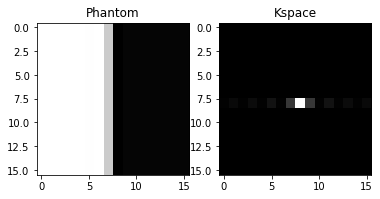

In [22]:
size = 16, 16
img = Image.open('phantom.png').convert('L')
img.thumbnail(size, Image.ANTIALIAS)
pixels = np.asarray(img)
Rf_pulse= np.cos(0) * pixels
k_space = np.zeros((16, 16), dtype = complex)
signal_w = 150 * (1 - np.exp(-TR / T1w)) * (np.exp(-TE / T2w))
signal_o = 75 * (1 - np.exp(-TR / T1o)) * (np.exp(-TE / T2o))

if (Rf_pulse.any() >= 243):
    Rf_pulse = Rf_pulse * signal_o
else:
    Rf_pulse = Rf_pulse * signal_w

for kRow in range(len(Rf_pulse)):
    for kCol in range(len(Rf_pulse)):
        Gx = 2 * np.pi * (kRow / len(Rf_pulse))
        Gy = 2 * np.pi * (kCol / len(Rf_pulse))
        for x in range(len(Rf_pulse)):
            for y in range(len(Rf_pulse)):
                total_theta = (Gx * x + Gy * y)
                k_space[kRow, kCol] += Rf_pulse[x, y] * np.exp(-1j * total_theta)

k = np.abs(np.fft.fftshift(k_space))
k_inv = np.abs(np.fft.ifft2(k_space))
for i in range(len(k)):
    k[i] = (k[i]-k.min()) * ((4 - 0) / (k.max() - k.min()) + 0)

f = plt.figure()
f.add_subplot(1, 2, 1)
plt.title('Phantom')
plt.imshow(pixels, cmap = 'gray')
f.add_subplot(1, 2, 2)
plt.title('Kspace')
plt.imshow(k, cmap = 'gray')
plt.show(block = True)

## Number3
    Add the non-uniformity function and regenerate the K-space image.

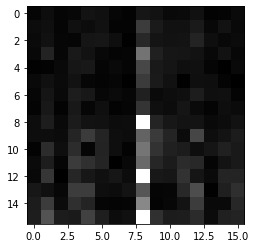

In [25]:
B = (np.random.randint(285, 315, size = 32))
size = 16, 16
img = Image.open('phantom.png').convert('L')
img.thumbnail(size, Image.ANTIALIAS)
pixels = np.asarray(img)
Rf_pulse= np.cos(0) * pixels
k_space = np.zeros((16, 16), dtype = complex)
signal_w = 150 * (1 - np.exp(-TR / T1w)) * (np.exp(-TE / T2w))
signal_o = 75 * (1 - np.exp(-TR / T1o)) * (np.exp(-TE / T2o))

if (Rf_pulse.any() >= 243):
    Rf_pulse = Rf_pulse * signal_o
else:
    Rf_pulse = Rf_pulse * signal_w
    
for kRow in range(len(Rf_pulse)):
    for kCol in range(len(Rf_pulse)):
        Gx = 2 * np.pi * (kRow / len(Rf_pulse))
        Gy = 2 * np.pi * (kCol / len(Rf_pulse))
        for x in range(len(Rf_pulse)):
            for y in range(len(Rf_pulse)):
                # for w in  range(len(Rf_pulse)):
                total_theta = ((Gx * x + Gy * y)* 2 * np.pi * 42.5 * B[x])
                k_space[kRow, kCol] += Rf_pulse[x, y] * np.exp(-1j * total_theta)

k = np.abs(np.fft.fftshift(k_space))
k_inv = np.abs(np.fft.ifft2(k_space))
for i in range(len(k)):
    k[i] = (k[i] - k.min()) * ((4 - 0) / (k.max() - k.min()) + 0)

f = plt.figure()
plt.imshow(k, cmap = 'gray')
plt.show(block = True)